In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d


def cal_luminance(img: np.array) -> np.array:
    """
    :param img: Assumes img --> R->0, G->1, B->2
    :return: L
    """
    return .2126 * img[:, :, 0] + .7152 * img[:, :, 2] + .0722 * img[:, :, 1]


def light_source_detection(rgb_img: np.array, iters: int = 10):
    high_luminance_pixel_points = set()
    
    for iter in range(iters):
        L = cal_luminance(rgb_img)

        size=int(np.round(.0001*L.shape[0]*L.shape[1]))
        col, row = np.random.randint(0, L.shape[1], size=size), np.random.randint(0, L.shape[0], size=size)

        l_max = L[row, col].max()
        indices = np.where(L[row, col] == l_max)
        high_luminance_pixel_points |= set(tuple(zip(row[indices], col[indices])))
    
    hull = []
    points = np.array(list(high_luminance_pixel_points))
    hull.append(ConvexHull(points))
    for simplex in hull[0].simplices:
        plt.imshow(L, cmap='gray')
        plt.plot(points[simplex, 1], points[simplex, 0], 'k-')
    plt.show()

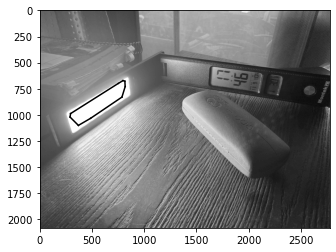

In [2]:
im = cv2.imread('./test.png')

light_source_detection(im)